#### Importing libraries

In [24]:
from pyomo.environ import *
import numpy as np
import qiskit
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms import QAOA, NumPyMinimumEigensolver
from qiskit.primitives import Sampler
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.optimizers import COBYLA

#### Defining the problem using the Pyomo library

Minimize:

Z = x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11

Subject to:

x1 + x2 >= 1

x2 + x3 >= 1

x4 + x5 >= 1

x7 + x8 >= 1

x6 + x7 >= 1

x2 + x6 >= 1

x1 + x6 >= 1

x4 + x7 >= 1

x2 + x4 >= 1

x5 + x8 >= 1

x3 + x5 >= 1

In [25]:
model = ConcreteModel()

model.x1 = Var(domain=Binary)
model.x2 = Var(domain=Binary)
model.x3 = Var(domain=Binary)
model.x4 = Var(domain=Binary)
model.x5 = Var(domain=Binary)
model.x6 = Var(domain=Binary)
model.x7 = Var(domain=Binary)
model.x8 = Var(domain=Binary)

model.z = Objective(expr=model.x1 + model.x2 + model.x3 + model.x4 + model.x5 + model.x6 + model.x7 + model.x8, sense=minimize)

model.constraint1 = Constraint(expr=model.x1 + model.x2 >= 1)
model.constraint2 = Constraint(expr=model.x2 + model.x3 >= 1)
model.constraint3 = Constraint(expr=model.x4 + model.x5 >= 1)
model.constraint4 = Constraint(expr=model.x7 + model.x8 >= 1)
model.constraint5 = Constraint(expr=model.x6 + model.x7 >= 1)
model.constraint6 = Constraint(expr=model.x2 + model.x6 >= 1)
model.constraint7 = Constraint(expr=model.x1 + model.x6 >= 1)
model.constraint8 = Constraint(expr=model.x4 + model.x7 >= 1)
model.constraint9 = Constraint(expr=model.x2 + model.x4 >= 1)
model.constraint10 = Constraint(expr=model.x5 + model.x8 >= 1)
model.constraint11 = Constraint(expr=model.x3 + model.x5 >= 1)

#### Solving the problem using the solver 'glpk'

In [26]:
solver = SolverFactory('glpk')
result = solver.solve(model)

In [27]:
print("Status:", result.solver.status)
print("Objective:", model.z())
print("x1:", model.x1())
print("x2:", model.x2())
print("x3:", model.x3())
print("x4:", model.x4())
print("x5:", model.x5())
print("x6:", model.x6())
print("x7:", model.x7())
print("x8:", model.x8())

Status: ok
Objective: 4.0
x1: 1.0
x2: 1.0
x3: 0.0
x4: 0.0
x5: 1.0
x6: 0.0
x7: 1.0
x8: 0.0


In [28]:
mod = QuadraticProgram("maximum coverage problem")
print(mod.prettyprint())

Problem name: maximum coverage problem

Minimize
  0

Subject to
  No constraints

  No variables



In [29]:
for i in range(8):
    mod.binary_var(name="x" + str(i + 1))
print(mod.prettyprint())

Problem name: maximum coverage problem

Minimize
  0

Subject to
  No constraints

  Binary variables (8)
    x1 x2 x3 x4 x5 x6 x7 x8



In [30]:
lin = np.ones(8)
print(lin)

[1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
quad = np.zeros((8, 8))
print(quad)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [32]:
mod.minimize(constant=0, linear=lin, quadratic=quad)
mod.linear_constraint(linear = {'x1':1, 'x2':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x2':1, 'x3':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x4':1, 'x5':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x7':1, 'x8':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x6':1, 'x7':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x2':1, 'x6':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x1':1, 'x6':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x4':1, 'x7':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x2':1, 'x4':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x5':1, 'x8':1}, sense='>=', rhs = 1)
mod.linear_constraint(linear = {'x3':1, 'x5':1}, sense='>=', rhs = 1)
print(mod.prettyprint())

Problem name: maximum coverage problem

Minimize
  x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8

Subject to
  Linear constraints (11)
    x1 + x2 >= 1  'c0'
    x2 + x3 >= 1  'c1'
    x4 + x5 >= 1  'c2'
    x7 + x8 >= 1  'c3'
    x6 + x7 >= 1  'c4'
    x2 + x6 >= 1  'c5'
    x1 + x6 >= 1  'c6'
    x4 + x7 >= 1  'c7'
    x2 + x4 >= 1  'c8'
    x5 + x8 >= 1  'c9'
    x3 + x5 >= 1  'c10'

  Binary variables (8)
    x1 x2 x3 x4 x5 x6 x7 x8



In [33]:
algorithm_globals.random_seed = 42
qaoa_mes = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 0.0])
exact_mes = NumPyMinimumEigensolver()

C:\Users\msala\AppData\Local\Temp\ipykernel_14616\997509213.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qaoa_mes = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 0.0])


In [34]:
qaoa_optimizer = MinimumEigenOptimizer(qaoa_mes)
exact_optimizer = MinimumEigenOptimizer(exact_mes)

In [35]:
exact_result = exact_optimizer.solve(mod)
print(exact_result.prettyprint())

objective function value: 4.0
variable values: x1=1.0, x2=1.0, x3=0.0, x4=0.0, x5=1.0, x6=0.0, x7=1.0, x8=0.0
status: SUCCESS


In [36]:
qaoa_result = qaoa_optimizer.solve(mod)
print(qaoa_result.prettyprint())

objective function value: 4.0
variable values: x1=1.0, x2=1.0, x3=0.0, x4=0.0, x5=1.0, x6=0.0, x7=1.0, x8=0.0
status: SUCCESS


In [37]:
qubo_problem = QuadraticProgramToQubo().convert(mod)
print(qubo_problem.prettyprint())

Problem name: maximum coverage problem

Minimize
  9*x1*x2 + 9*x1*x6 + 9*x2*x3 + 9*x2*x4 + 9*x2*x6 + 9*x3*x5 + 9*x4*x5 + 9*x4*x7
  + 9*x5*x8 + 9*x6*x7 + 9*x7*x8 - 17*x1 - 35*x2 - 17*x3 - 26*x4 - 26*x5 - 26*x6
  - 26*x7 - 17*x8 + 99

Subject to
  No constraints

  Binary variables (8)
    x1 x2 x3 x4 x5 x6 x7 x8



In [70]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, EstimatorV2 as Estimator
from qiskit.circuit.library import QAOAAnsatz
from scipy.optimize import minimize
from qiskit.visualization import plot_distribution

In [47]:
hamiltonian, offset = qubo_problem.to_ising()

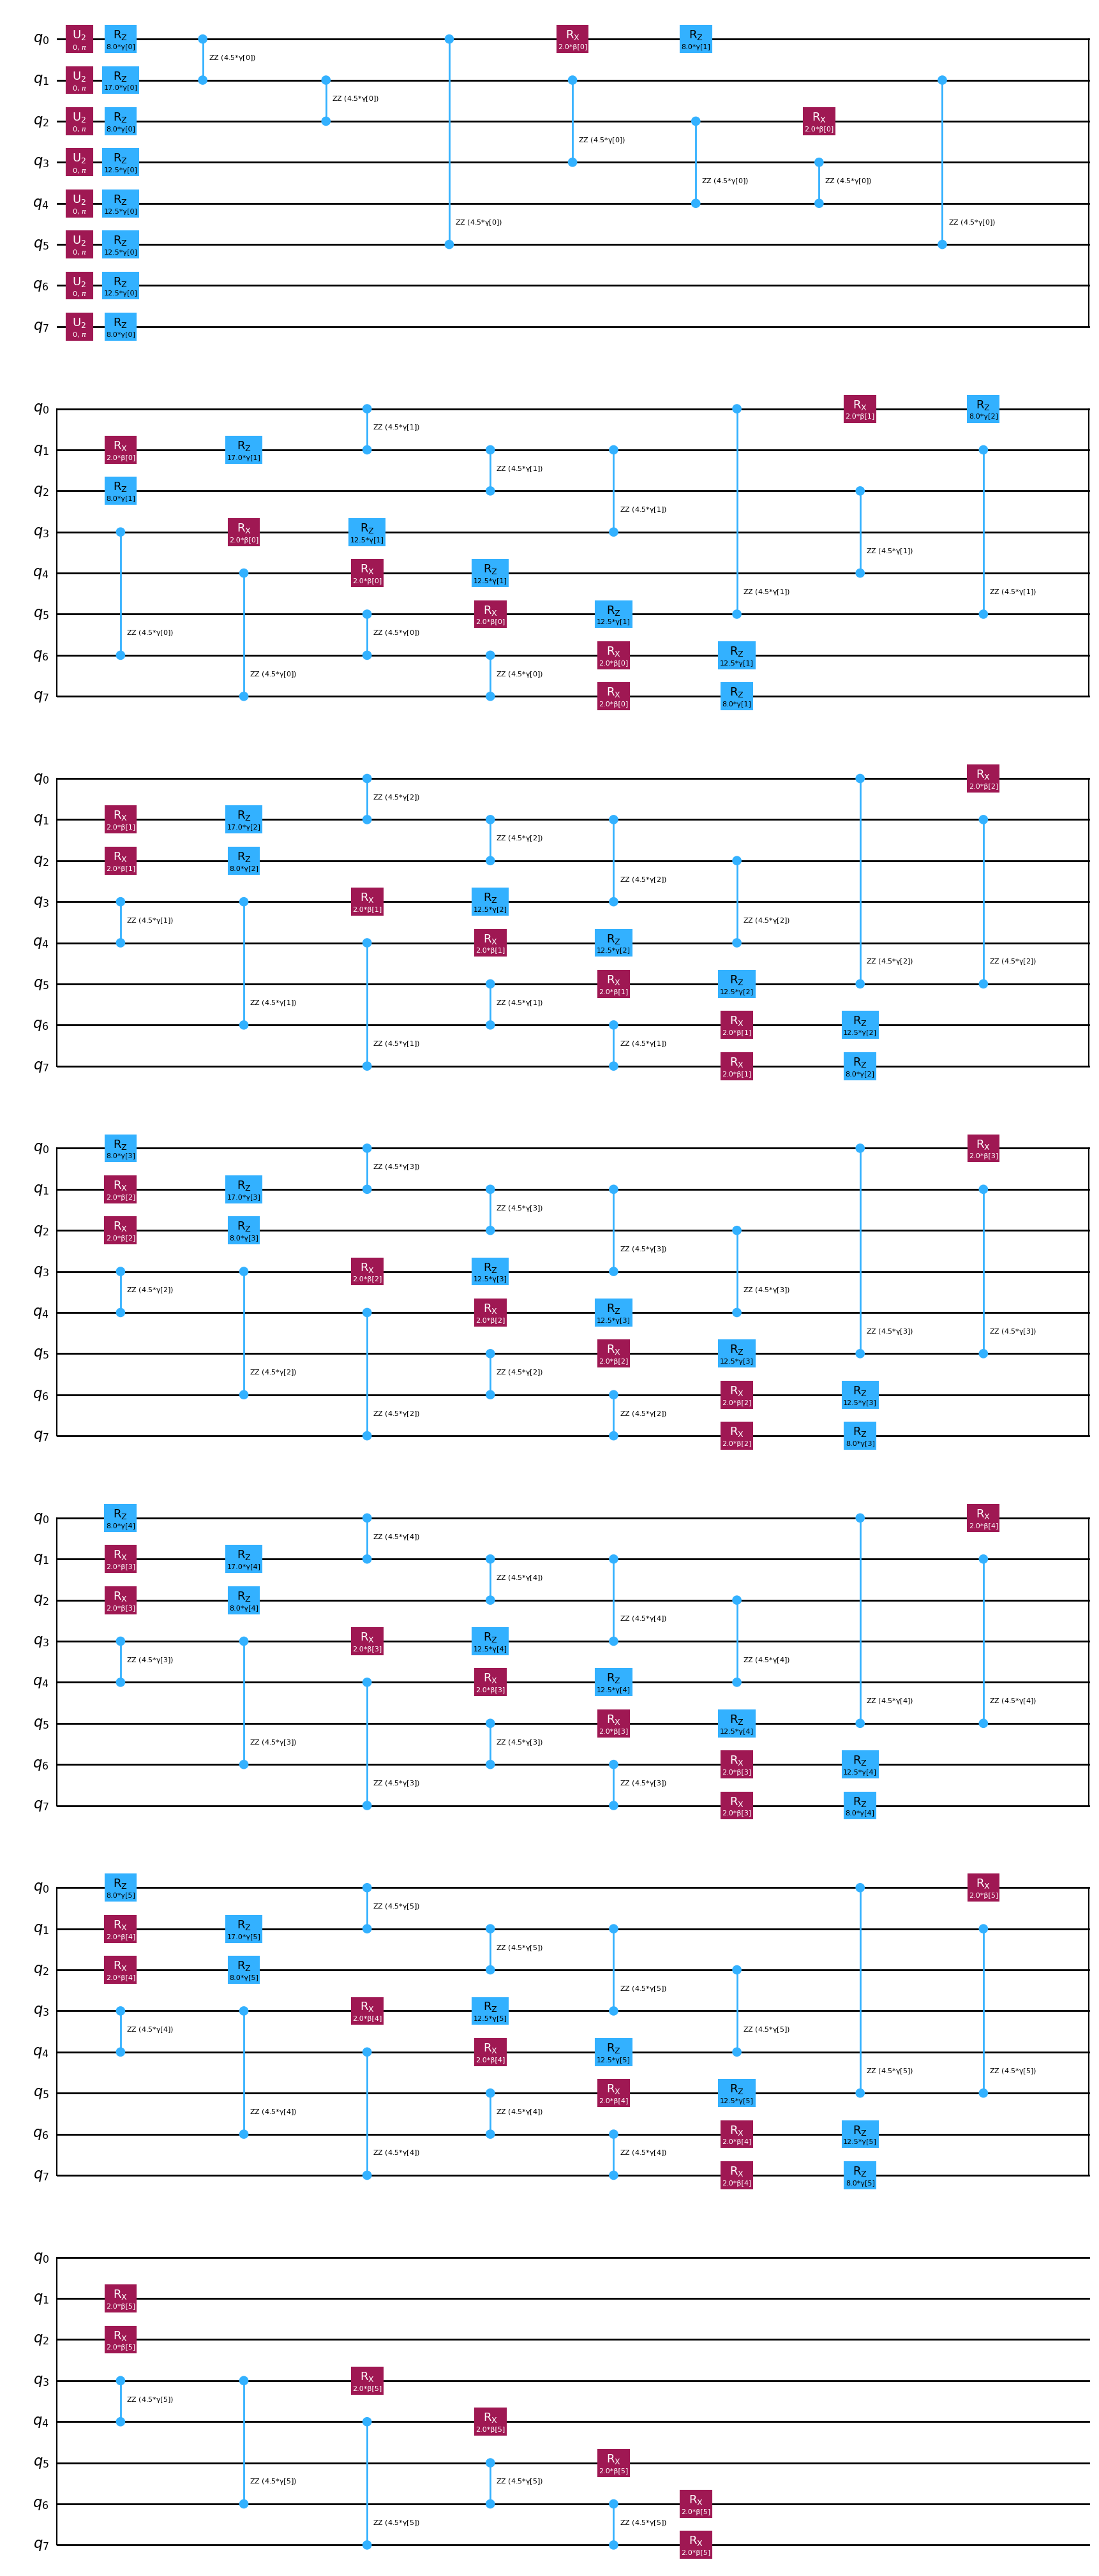

In [136]:
ansatz = QAOAAnsatz(hamiltonian, reps=6)
ansatz.decompose(reps=2).draw(output="mpl", style="iqp")

In [120]:
aer_sim = AerSimulator()
backend_config = aer_sim.configuration()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
ansatz_isa = pm.run(ansatz)

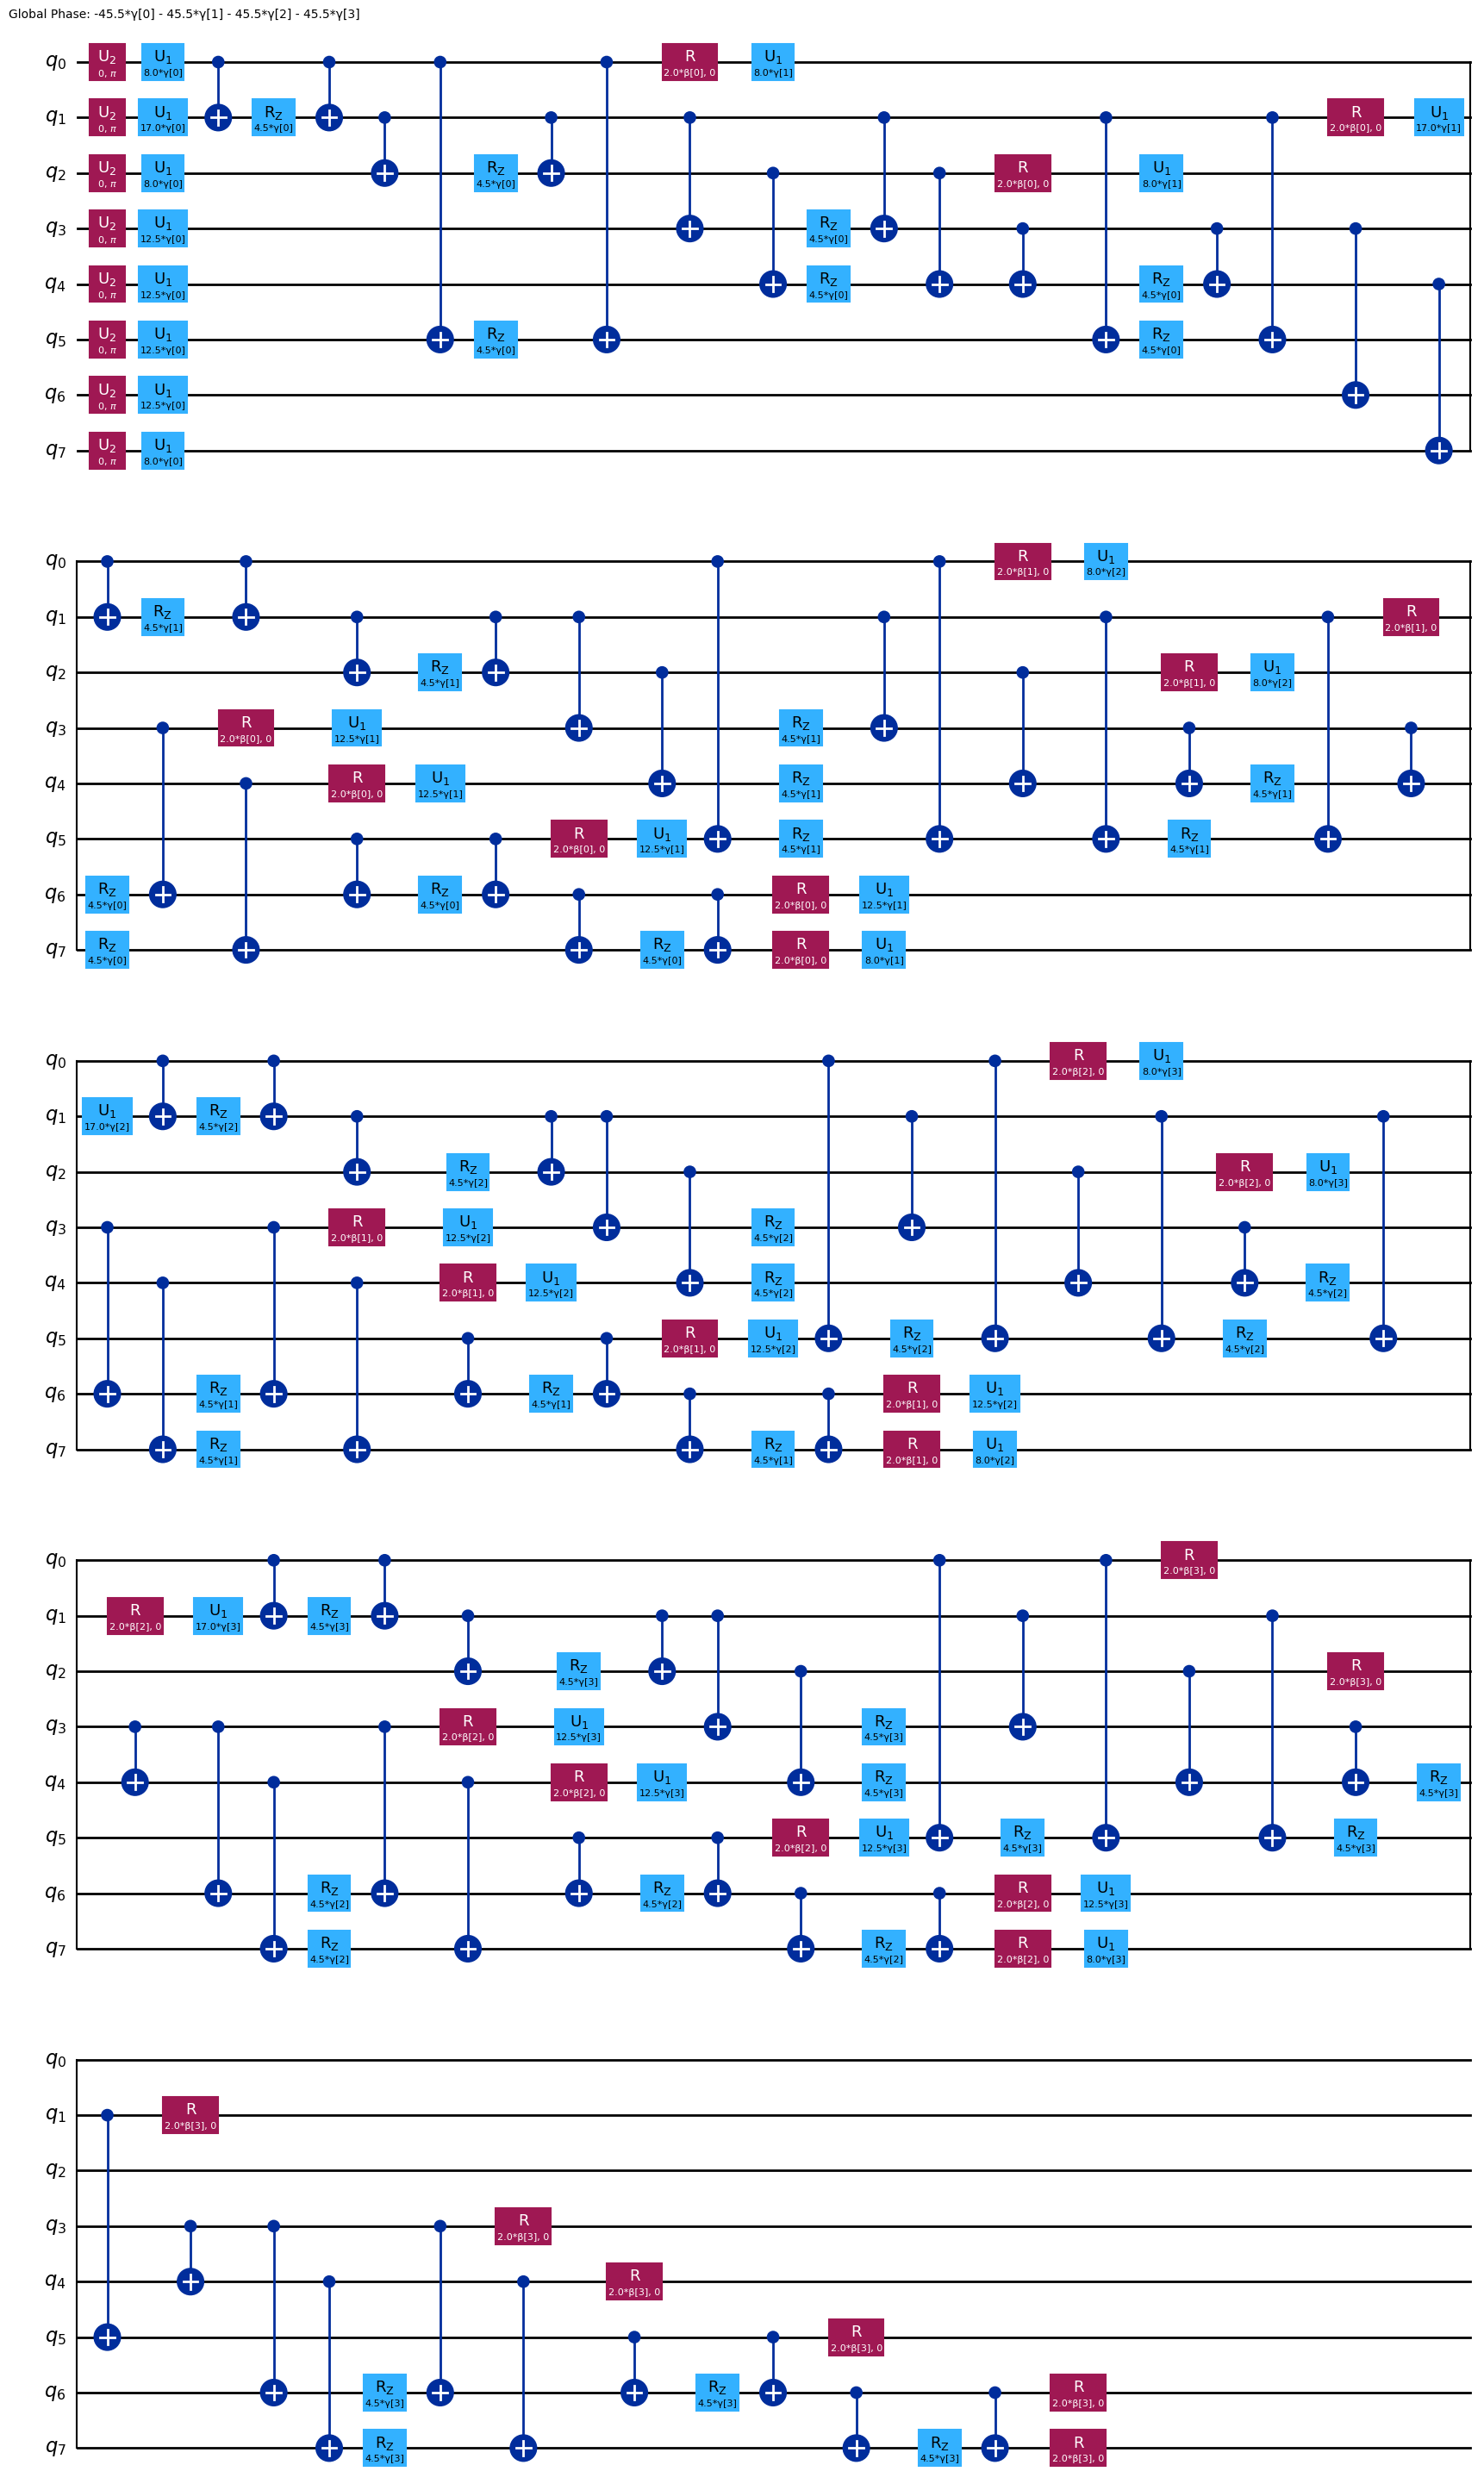

In [137]:
ansatz_isa.decompose(reps=1).draw(output="mpl", style="iqp")

In [3]:
hamiltonian_isa = hamiltonian.apply_layout(ansatz_isa.layout)

NameError: name 'hamiltonian' is not defined

In [2]:
hamiltonian_isa
hamiltonian

NameError: name 'hamiltonian_isa' is not defined

In [139]:
def check_hamiltonian_consistency(hamiltonian_qaoa, hamiltonian_exact):
    if np.allclose(hamiltonian_qaoa.to_matrix(), hamiltonian_exact.to_matrix()):
        print("Hamiltonians are consistent.")
    else:
        print("Hamiltonians are inconsistent.")

check_hamiltonian_consistency(hamiltonian_isa, hamiltonian)

Hamiltonians are consistent.


In [125]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    cost = result[0].data.evs[0]

    return cost

In [140]:
estimator = Estimator(backend=aer_sim)
estimator.options.default_shots = 50_000
estimator.options.dynamical_decoupling.enable = True

x0 = 2 * np.pi * np.random.rand(ansatz_isa.num_parameters)
res = minimize(cost_func, x0, args=(ansatz_isa, hamiltonian_isa, estimator), method="COBYLA")

C:\Users\msala\AppData\Local\Temp\ipykernel_14616\1674081987.py:1: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  estimator = Estimator(backend=aer_sim)
d:\Faculdade\ICquantica\Operations-Research-QAOA\.venv\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:232: UserWarning: Options {'dynamical_decoupling': {'enable': True}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")
d:\Faculdade\ICquantica\Operations-Research-QAOA\.venv\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:232: UserWarning: Options {'dynamical_decoupling': {'enable': True}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")
d:\Faculdade\ICquantica\Operations-Research-QAOA\.venv\Lib\sit

In [141]:
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -11.235680000000004
       x: [ 4.518e+00  1.943e+00  8.912e-01  1.695e+00  4.493e+00
            6.074e+00  3.310e+00  3.942e+00]
    nfev: 102
   maxcv: 0.0


In [144]:
print(x0)
print(res.x)

[3.47653108 1.95989197 0.91363922 0.69989862 4.51094561 6.10967899
 3.30515657 2.95214777]
[4.51849299 1.94348253 0.89120211 1.69502544 4.49277424 6.07446153
 3.31018058 3.94204106]


In [145]:
qc = ansatz.assign_parameters(res.x)
qc.measure_all()
qc_isa = pm.run(qc)
qc_isa.draw(output="mpl", idle_wires=False, style="iqp")

ValueError: Mismatching number of values and parameters. For partial binding please pass a dictionary of {parameter: value} pairs.

In [146]:
sampler = Sampler(backend=aer_sim)
sampler.options.default_shots = 50_000
sampler.options.dynamical_decoupling.enable = True

C:\Users\msala\AppData\Local\Temp\ipykernel_14616\1437145507.py:1: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=aer_sim)


In [147]:
result = sampler.run([qc_isa]).result()
samp_dist = result[0].data.meas.get_counts()
samp_dist

d:\Faculdade\ICquantica\Operations-Research-QAOA\.venv\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:232: UserWarning: Options {'dynamical_decoupling': {'enable': True}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


{'11111010': 4176,
 '01011011': 447,
 '00111010': 405,
 '01011000': 196,
 '01111111': 3369,
 '11111111': 1945,
 '11111011': 2831,
 '11011001': 92,
 '01111000': 1820,
 '10111010': 525,
 '01011111': 339,
 '01101111': 278,
 '01111110': 4866,
 '01111011': 4715,
 '01111010': 7108,
 '00111011': 251,
 '01011110': 188,
 '11101111': 251,
 '01111100': 587,
 '10111110': 332,
 '11111110': 2795,
 '01101010': 318,
 '01111001': 530,
 '01110110': 241,
 '01011100': 96,
 '01111101': 191,
 '01011010': 325,
 '01101011': 199,
 '11111000': 1134,
 '11110001': 36,
 '11001110': 33,
 '11110000': 128,
 '01110111': 206,
 '11001011': 28,
 '11011100': 61,
 '11110010': 251,
 '10111111': 172,
 '01110010': 497,
 '11011011': 261,
 '00101111': 34,
 '00111111': 149,
 '00111001': 67,
 '11110110': 218,
 '11101000': 111,
 '01110011': 330,
 '11110100': 57,
 '00111000': 130,
 '11001100': 11,
 '11011111': 173,
 '11100110': 27,
 '11111101': 148,
 '11101100': 71,
 '11110111': 176,
 '11011000': 138,
 '11111100': 393,
 '01101101':

In [148]:
most_probable_state = max(samp_dist, key=samp_dist.get)
count_most_probable_state = samp_dist[most_probable_state]

# Calcule a probabilidade do estado mais provável
total_samples = sum(samp_dist.values())
probability_most_probable_state = count_most_probable_state / total_samples

print("Estado mais provável:", most_probable_state)
print("Probabilidade correspondente:", probability_most_probable_state)

Estado mais provável: 01111010
Probabilidade correspondente: 0.14216


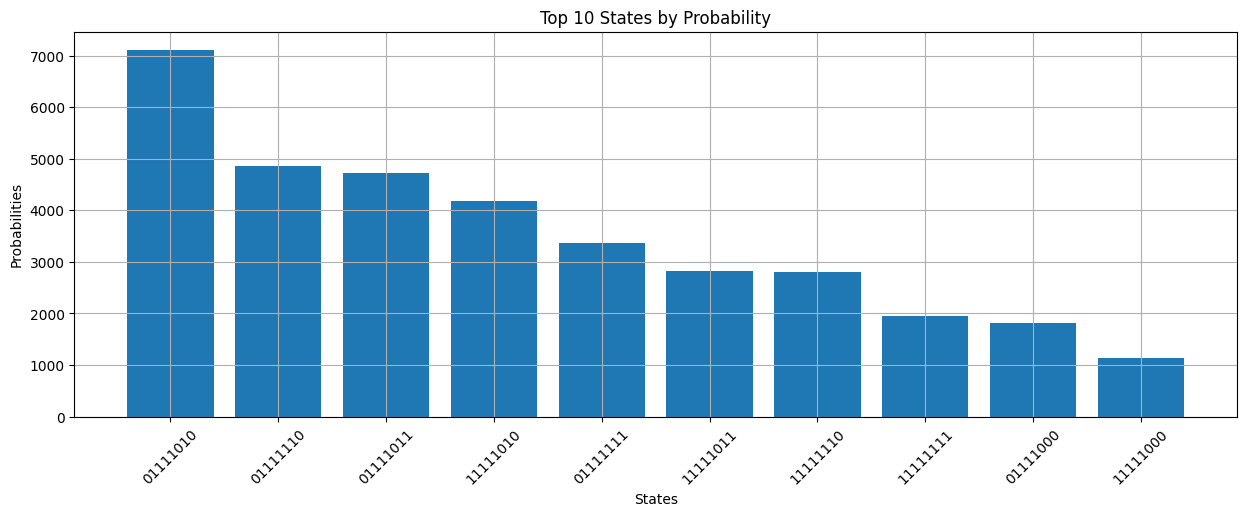

In [149]:
import matplotlib.pyplot as plt


top_10_dist = dict(sorted(samp_dist.items(), key=lambda item: item[1], reverse=True)[:10])

def plot_distribution(distribution, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    plt.bar(top_10_dist.keys(), top_10_dist.values())
    plt.xlabel('States')
    plt.ylabel('Probabilities')
    plt.title('Top 10 States by Probability')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_distribution(top_10_dist)

In [1]:
print(9*1*1 + 9*1*0 + 9*1*0 + 9*1*0 + 9*1*0 + 9*0*1 + 9*0*1 + 9*0*1
  + 9*1*0 + 9*0*1 + 9*1*0 - 17*1 - 35*1 - 17*0 - 26*0 - 26*1 - 26*0
  - 26*1 - 17*0 + 99)

4
